In [418]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy.stats as stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import random
rng = np.random.default_rng()
sn.set_style('whitegrid')

In [419]:
#import and create cleaned stimuli strings which can be copied directly into GPT if desired
#find difference score between human ratings (Graves 2013) and GPTv3.5 (March 14)

home_direct = 'C:/Users/Nick/Downloads/meat-kangaroo-main/'

all_words_and_measures = pd.read_csv(home_direct + 'graves_with_vecs.csv', skipinitialspace=True, )
all_words_and_measures = all_words_and_measures.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

all_words_and_measures['Humans Binary'] = np.where(
    all_words_and_measures['Humans Continuous'] >= 2.5, 'Makes Sense', np.where(
    all_words_and_measures['Humans Continuous'] <= 1.5, 'Nonsense', 'Ambiguous'))

#all_words_and_measures['Stim'] = 'the ' + all_words_and_measures['Stim'].str.replace('-', ' ') + '.'
all_words_and_measures['Difference Score'] = abs(all_words_and_measures['Humans Continuous'] - all_words_and_measures['GPT Continuous Temp 0'])
all_words_and_measures

# all_words_and_measures.to_excel('cleaned_words.xlsx')

,Stim,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,...,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,pairs,Word2Vec,GloVe,Taxonomic,Humans Binary,Difference Score
0,the dog puppy.,Makes Sense,Makes Sense,Makes Sense,4,4,4,-1,1.86,1.19,...,1372,3.11,1.94,5.05,dog puppy,0.810643,0.593606,0.787731,Ambiguous,2.14
1,the baby teeth.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,3.82,0.48,...,4677,3.52,3.14,6.66,baby teeth,0.202178,0.313774,0.375739,Makes Sense,1.82
2,the dress summer.,Makes Sense,Makes Sense,Makes Sense,2,2,2,-1,1.00,1.24,...,3681,3.18,3.34,6.52,dress summer,0.094827,0.213653,0.126392,Nonsense,1.00
3,the boot car.,Nonsense,Nonsense,Nonsense,2,1,2,-1,0.71,0.98,...,5103,2.20,3.69,5.90,boot car,0.223294,0.163418,0.444087,Nonsense,1.29
4,the pig truck.,Nonsense,Nonsense,Nonsense,2,2,2,1,1.93,1.56,...,764,2.51,2.65,5.15,pig truck,0.189152,0.151660,0.311380,Ambiguous,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,the goat cheese.,Makes Sense,Makes Sense,Makes Sense,3,2,3,1,3.83,0.76,...,706,2.32,2.70,5.02,goat cheese,0.317911,0.606518,0.427718,Makes Sense,0.83
2156,the sand beach.,Makes Sense,Makes Sense,Makes Sense,2,2,3,-1,2.68,1.25,...,2012,2.98,3.03,6.00,sand beach,0.520518,0.468190,0.487241,Makes Sense,0.68
2157,the mouth pig.,Makes Sense,Makes Sense,Makes Sense,1,1,2,-1,0.29,0.60,...,2731,3.38,2.51,5.89,mouth pig,0.314613,0.395392,0.279621,Nonsense,0.71
2158,the field flower.,Makes Sense,Makes Sense,Makes Sense,2,2,3,-1,2.70,1.46,...,2823,3.37,2.70,6.06,field flower,0.124187,0.124687,0.296407,Makes Sense,0.70


In [420]:
all_words_and_measures.describe().round(decimals=2)

,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,N,EAT,Both,LSA,...,W1frq,W2frq,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,Word2Vec,GloVe,Taxonomic,Difference Score
count,2160.00,2160.00,2160.00,2160.0,2160.00,2160.00,2160.00,2045.00,2144.00,2160.00,...,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00,2160.00
mean,2.77,2.71,2.59,0.0,2.03,1.05,28.38,0.02,0.02,0.19,...,1724.97,1724.97,3449.94,2.88,2.88,5.76,0.23,0.27,0.39,1.24
std,0.75,0.67,0.55,1.0,1.22,0.40,1.59,0.06,0.06,0.16,...,2209.81,2209.81,3127.70,0.61,0.61,0.88,0.14,0.13,0.18,0.80
min,0.00,0.00,0.00,-1.0,0.04,0.00,26.00,0.00,0.00,-0.03,...,7.00,7.00,83.00,0.85,0.85,3.21,-0.05,-0.07,0.08,0.00
25%,2.00,2.00,2.00,-1.0,0.97,0.85,28.00,0.00,0.00,0.07,...,280.50,280.50,1146.25,2.45,2.45,5.18,0.13,0.18,0.26,0.64
50%,3.00,3.00,3.00,0.0,1.69,1.13,28.00,0.00,0.00,0.15,...,829.00,829.00,2252.00,2.92,2.92,5.81,0.21,0.26,0.36,1.10
75%,3.00,3.00,3.00,1.0,3.24,1.33,29.00,0.00,0.00,0.27,...,1998.00,1998.00,5050.50,3.30,3.30,6.39,0.30,0.35,0.50,1.76
max,4.00,4.00,4.00,1.0,4.00,1.85,58.00,1.00,0.73,0.87,...,8831.00,8831.00,15827.00,3.95,3.95,7.79,0.81,0.71,0.97,3.90


<AxesSubplot:ylabel='Count'>

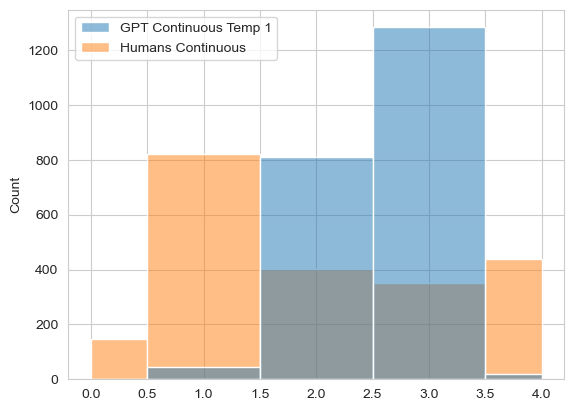

In [421]:
sn.histplot(data=all_words_and_measures[['GPT Continuous Temp 1', 'Humans Continuous']], bins=[0,.5,1.5,2.5,3.5,4])

<AxesSubplot:xlabel='Humans Binary', ylabel='count'>

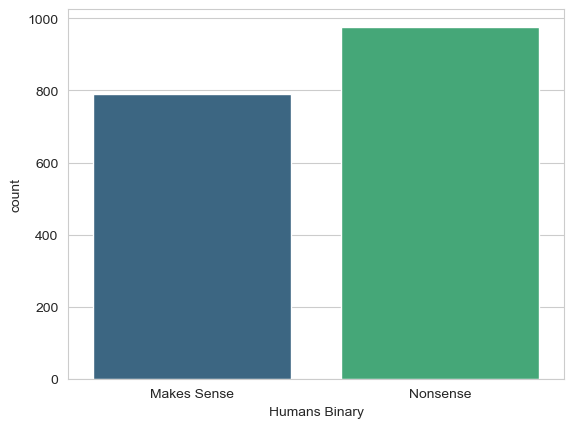

In [422]:
sn.countplot(data=remove_middle, x="Humans Binary", palette='viridis')

                   Stim   GPT Temp 0  GPT Temp .5   GPT Temp 1  \
1       the baby teeth.  Makes Sense  Makes Sense  Makes Sense   
2     the dress summer.  Makes Sense  Makes Sense  Makes Sense   
3         the boot car.     Nonsense     Nonsense     Nonsense   
5        the boy cabin.     Nonsense     Nonsense     Nonsense   
6        the heart guy.  Makes Sense  Makes Sense  Makes Sense   
...                 ...          ...          ...          ...   
2155   the goat cheese.  Makes Sense  Makes Sense  Makes Sense   
2156    the sand beach.  Makes Sense  Makes Sense  Makes Sense   
2157     the mouth pig.  Makes Sense  Makes Sense  Makes Sense   
2158  the field flower.  Makes Sense  Makes Sense  Makes Sense   
2159    the truck milk.  Makes Sense  Makes Sense  Makes Sense   

      GPT Continuous Temp 0  GPT Continuous Temp .5  GPT Continuous Temp 1  \
1                         2                       2                      2   
2                         2                       2

<AxesSubplot:xlabel='SD', ylabel='Count'>

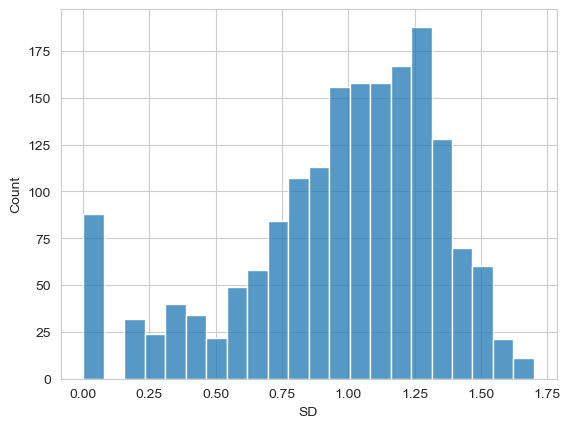

In [423]:
# sn.histplot(data=all_words_and_measures['SD'])

remove_middle = all_words_and_measures[all_words_and_measures['Humans Binary'].isin(['Makes Sense', 'Nonsense'])]
print(remove_middle)

sn.histplot(data=remove_middle['SD'])

# meaningful = remove_middle[remove_middle['Humans Binary'] == 'Makes Sense']
# nonsense = remove_middle[remove_middle['Humans Binary'] == 'Nonsense']

# sn.histplot(data=meaningful['SD'], bins=12)

# sn.histplot(data=nonsense['SD'], bins=12)

<AxesSubplot:ylabel='Count'>

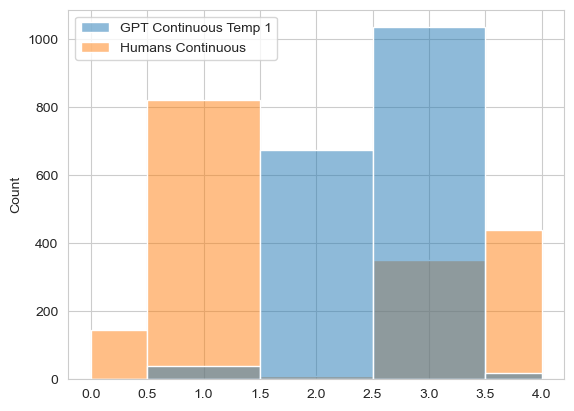

In [424]:
sn.histplot(data=remove_middle[['GPT Continuous Temp 1', 'Humans Continuous']], bins=[0,.5,1.5,2.5,3.5,4])

In [443]:
#set the SD that you'd like to remove
#i.e., setting as '1' removes all items where 1 SD away would change the answer from makes sense to nonsense and vice versa

#one tailed test, p < .05 means SD of 1.65
# p < .01 means SD of 2.32
# p < .001 means SD of 3.09

SD = 3.09


sensible_SD = remove_middle[(remove_middle['Humans Continuous'] >= 2.5) & (remove_middle['Humans Continuous'] - (SD * remove_middle['SD']) >= 1.5)]
nonsensible_SD = remove_middle[(remove_middle['Humans Continuous'] <= 1.5) & (remove_middle['Humans Continuous'] + (SD * remove_middle['SD']) <= 2.5)]

remove_by_SD = pd.concat([sensible_SD, nonsensible_SD])

remove_by_SD

,Stim,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,...,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,pairs,Word2Vec,GloVe,Taxonomic,Humans Binary,Difference Score
1,the baby teeth.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,3.82,0.48,...,4677,3.52,3.14,6.66,baby teeth,0.202178,0.313774,0.375739,Makes Sense,1.82
11,the mother goose.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,3.93,0.26,...,7463,3.87,2.03,5.90,mother goose,0.111952,0.172899,0.216462,Makes Sense,1.93
15,the tennis star.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,4.00,0.00,...,1350,2.60,2.98,5.58,tennis star,0.150417,0.279164,0.158341,Makes Sense,2.00
21,the mountain road.,Nonsense,Nonsense,Nonsense,2,2,3,1,3.72,0.70,...,4620,2.92,3.58,6.50,mountain road,0.300693,0.397754,0.441071,Makes Sense,1.72
24,the newspaper photograph.,Makes Sense,Makes Sense,Makes Sense,2,2,3,1,3.82,0.61,...,1651,3.05,2.73,5.78,newspaper photograph,0.256857,0.347154,0.231118,Makes Sense,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,the refrigerator hospital.,Nonsense,Makes Sense,Nonsense,3,3,3,-1,0.25,0.65,...,2036,2.18,3.28,5.46,refrigerator hospital,0.159486,0.088257,0.180821,Nonsense,2.75
1900,the nose cucumber.,Makes Sense,Makes Sense,Makes Sense,2,2,2,-1,0.11,0.42,...,1361,3.12,1.73,4.85,nose cucumber,0.197819,0.060003,0.214042,Nonsense,1.89
2112,the phone street.,Makes Sense,Makes Sense,Makes Sense,2,2,3,-1,0.31,0.66,...,5960,3.15,3.66,6.81,phone street,0.148932,0.180268,0.260264,Nonsense,1.69
2127,the building mountain.,Makes Sense,Makes Sense,Makes Sense,2,2,2,-1,0.36,0.62,...,3683,3.46,2.92,6.37,building mountain,0.115804,0.183907,0.353960,Nonsense,1.64


In [444]:
GPT_wrong = remove_by_SD[(remove_by_SD['GPT Temp 1'] != remove_by_SD['Humans Binary'])]
GPT_wrong

,Stim,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,...,Wordfrq_sum,Logw1frq,Logw2frq,Logwordfrq_sum,pairs,Word2Vec,GloVe,Taxonomic,Humans Binary,Difference Score
21,the mountain road.,Nonsense,Nonsense,Nonsense,2,2,3,1,3.72,0.70,...,4620,2.92,3.58,6.50,mountain road,0.300693,0.397754,0.441071,Makes Sense,1.72
86,the police truck.,Makes Sense,Makes Sense,Nonsense,2,2,2,1,3.72,0.53,...,4214,3.58,2.65,6.22,police truck,0.291421,0.348572,0.299467,Makes Sense,1.72
88,the chicken meat.,Makes Sense,Makes Sense,Nonsense,2,2,2,1,3.86,0.76,...,1814,2.73,3.11,5.83,chicken meat,0.679913,0.689187,0.895736,Makes Sense,1.86
118,the orange tent.,Makes Sense,Makes Sense,Nonsense,2,2,2,1,3.86,0.45,...,1152,2.69,2.82,5.51,orange tent,0.128859,0.166179,0.221037,Makes Sense,1.86
166,the ballet school.,Nonsense,Nonsense,Nonsense,2,2,2,1,4.00,0.00,...,7256,2.43,3.84,6.28,ballet school,0.176196,0.285963,0.280350,Makes Sense,2.00
185,the nail gun.,Nonsense,Nonsense,Nonsense,2,2,2,1,3.82,0.55,...,1354,2.33,3.06,5.39,nail gun,0.137690,0.257835,0.486687,Makes Sense,1.82
229,the snow truck.,Makes Sense,Makes Sense,Nonsense,2,2,2,1,3.62,0.62,...,1499,3.02,2.65,5.67,snow truck,0.196037,0.208182,0.379937,Makes Sense,1.62
242,the phone book.,Nonsense,Nonsense,Nonsense,2,2,2,1,4.00,0.00,...,6346,3.15,3.69,6.84,phone book,0.167863,0.219167,0.412286,Makes Sense,2.00
290,the infant gorilla.,Nonsense,Nonsense,Nonsense,2,2,2,1,3.73,0.72,...,406,2.57,1.53,4.10,infant gorilla,0.245208,0.225160,0.596036,Makes Sense,1.73
856,the butt cheek.,Nonsense,Nonsense,Nonsense,2,2,1,1,3.79,0.50,...,563,2.08,2.65,4.73,butt cheek,0.380631,0.332747,0.590026,Makes Sense,1.79


In [445]:
fobs = remove_by_SD['GPT Temp 1'].value_counts()
fobs_x = fobs[0]
fobs_y = fobs[1]

fexp = remove_by_SD['Humans Binary'].value_counts()
fexp_x = fexp[0]
fexp_y = fexp[1]

print('fobs: ', fobs)
print('fexp: ', fexp)

print(stats.chisquare(f_obs=[fobs_x, fobs_y], f_exp=[fexp_x,fexp_y]))

fobs:  Makes Sense    315
Nonsense        43
Name: GPT Temp 1, dtype: int64
fexp:  Makes Sense    294
Nonsense        64
Name: Humans Binary, dtype: int64
Power_divergenceResult(statistic=8.390625, pvalue=0.0037716120102571716)


<AxesSubplot:ylabel='Count'>

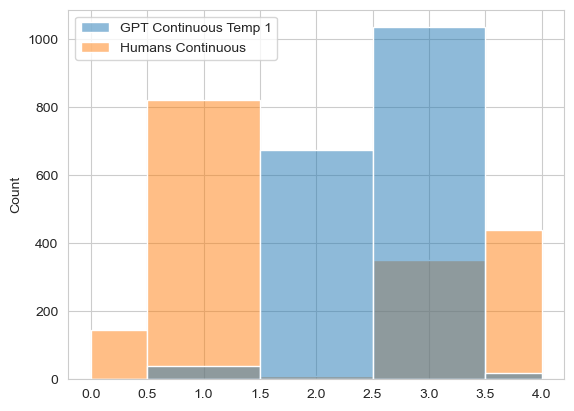

In [428]:
sn.histplot(data=remove_by_SD[['GPT Continuous Temp 1', 'Humans Continuous']], bins=[0,.5,1.5,2.5,3.5,4])

GPT Temp 1     Makes Sense  Nonsense
Humans Binary                       
Makes Sense            732        59
Nonsense               730       247


<AxesSubplot:xlabel='Humans Binary'>

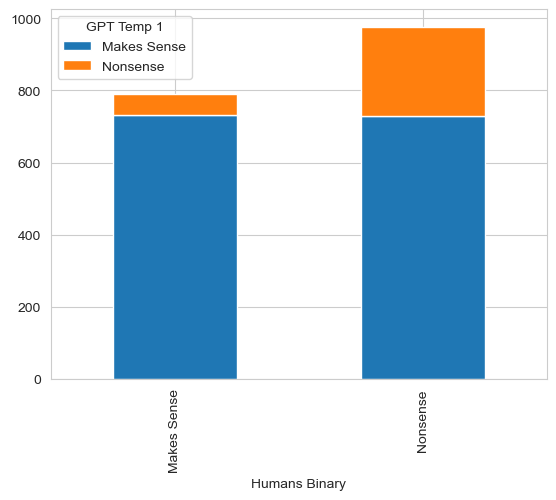

In [429]:
#Out of ~1000 nonsense labels by humans, over 700 are labeled as 'Makes Sense' by GPT 3.5

#sn.countplot(data=remove_middle, x="Humans Binary", palette='viridis', hue="GPT Temp 0")

df_plot = remove_by_SD.groupby(['GPT Temp 1', 'Humans Binary']).size().reset_index().pivot(columns='GPT Temp 1', index='Humans Binary', values=0)
print(df_plot)

df_plot.plot(kind='bar', stacked=True)

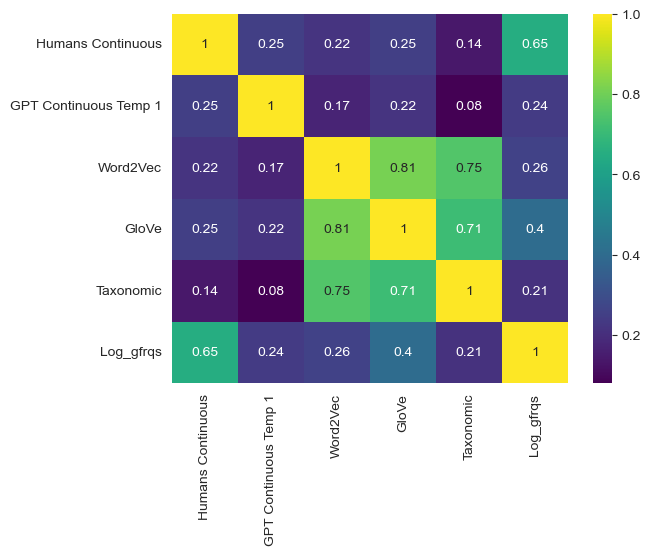

In [430]:
abbrev_measures = remove_by_SD[['Humans Continuous', 'GPT Continuous Temp 1', 'Word2Vec', 'GloVe', 'Taxonomic', 'Log_gfrqs']]
corr_mat = abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

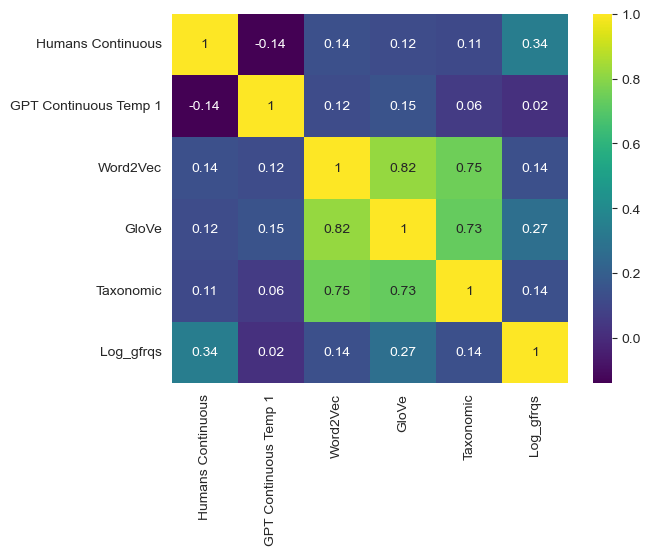

In [431]:
abbrev_measures = GPT_wrong[['Humans Continuous', 'GPT Continuous Temp 1', 'Word2Vec', 'GloVe', 'Taxonomic', 'Log_gfrqs']]
corr_mat = abbrev_measures.corr().round(decimals=2)
sn.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

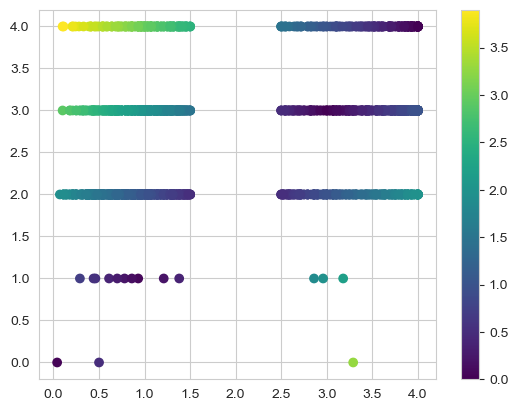

In [432]:
#scatter of Graves 2013 with GPT. Colors and Sizes reflect the difference scores between the two

sn.set_style('whitegrid')
cmap = sn.color_palette("viridis", as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(remove_by_SD['Humans Continuous'], remove_by_SD['GPT Continuous Temp 0'], c=remove_by_SD['Difference Score'], cmap=cmap)
f.colorbar(points)

In [433]:
answer_types = [
    (remove_by_SD['GPT Temp 1'] == 'Makes Sense') & (remove_by_SD['Humans Binary'] == 'Nonsense'),
    (remove_by_SD['GPT Temp 1'] == 'Nonsense') & (remove_by_SD['Humans Binary'] == 'Makes Sense'),
    (remove_by_SD['GPT Temp 1'] == 'Makes Sense') & (remove_by_SD['Humans Binary'] == 'Makes Sense'),
    (remove_by_SD['GPT Temp 1'] == 'Nonsense') & (remove_by_SD['Humans Binary'] == 'Nonsense')
]

answer_names = ['False Alarm', 'Miss', 'Hit', 'Correct Rejection']

remove_by_SD['Answer Type'] = np.select(answer_types, answer_names)

print(remove_by_SD)

                    Stim   GPT Temp 0  GPT Temp .5   GPT Temp 1  \
1        the baby teeth.  Makes Sense  Makes Sense  Makes Sense   
11     the mother goose.  Makes Sense  Makes Sense  Makes Sense   
15      the tennis star.  Makes Sense  Makes Sense  Makes Sense   
17         the dime bag.     Nonsense     Nonsense     Nonsense   
19       the sky rocket.  Makes Sense     Nonsense  Makes Sense   
...                  ...          ...          ...          ...   
2152       the bed lake.  Makes Sense  Makes Sense  Makes Sense   
2153       the tree tea.  Makes Sense  Makes Sense  Makes Sense   
2154  the picture beach.  Makes Sense  Makes Sense  Makes Sense   
2157      the mouth pig.  Makes Sense  Makes Sense  Makes Sense   
2159     the truck milk.  Makes Sense  Makes Sense  Makes Sense   

      GPT Continuous Temp 0  GPT Continuous Temp .5  GPT Continuous Temp 1  \
1                         2                       2                      2   
11                        2            

In [434]:
hits = remove_by_SD['Answer Type'].value_counts()['Hit']
misses = remove_by_SD['Answer Type'].value_counts()['Miss']
fas = remove_by_SD['Answer Type'].value_counts()['False Alarm']
crs = remove_by_SD['Answer Type'].value_counts()['Correct Rejection']

print('hits = ', hits)
print('misses = ', misses)
print('fas = ', fas)
print('crs = ', crs)

hits =  732
misses =  59
fas =  730
crs =  247


In [435]:
from scipy.stats import norm
import math
Z = norm.ppf

def SDT(hits, misses, fas, crs):
    """ returns a dict with d-prime measures given hits, misses, false alarms, and correct rejections"""
    # Floors an ceilings are replaced by half hits and half FA's
    half_hit = 0.5 / (hits + misses)
    half_fa = 0.5 / (fas + crs)
     # Calculate hit_rate and avoid d' infinity
    hit_rate = hits / (hits + misses)
    if hit_rate == 1: 
        hit_rate = 1 - half_hit
    if hit_rate == 0: 
        hit_rate = half_hit
 
    # Calculate false alarm rate and avoid d' infinity
    fa_rate = fas / (fas + crs)
    if fa_rate == 1: 
        fa_rate = 1 - half_fa
    if fa_rate == 0: 
        fa_rate = half_fa
 
    # Return d', beta, c and Ad'
    out = {}
    out['d'] = Z(hit_rate) - Z(fa_rate)
    out['beta'] = math.exp((Z(fa_rate)**2 - Z(hit_rate)**2) / 2)
    out['c'] = -(Z(hit_rate) + Z(fa_rate)) / 2
    out['Ad'] = norm.cdf(out['d'] / math.sqrt(2))
    
    return(out)

In [436]:
SDT(hits, misses, fas, crs)

{'d': 0.7767817242171585,
 'beta': 0.4409753977939232,
 'c': -1.054049248174552,
 'Ad': 0.7085890990319968}

<AxesSubplot:xlabel='Answer Type', ylabel='Count'>

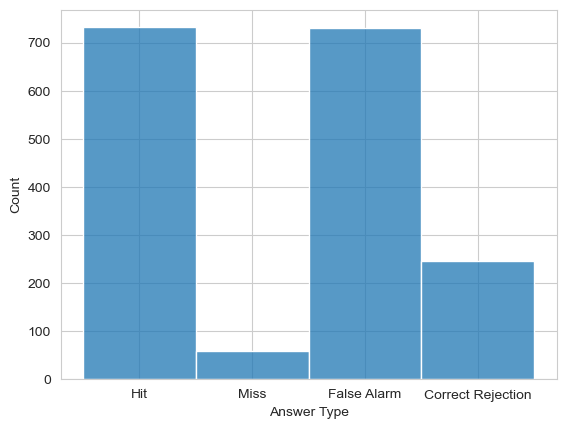

In [437]:
sn.histplot(data=remove_by_SD['Answer Type'])

<AxesSubplot:xlabel='Humans Continuous', ylabel='GPT Continuous Temp 0'>

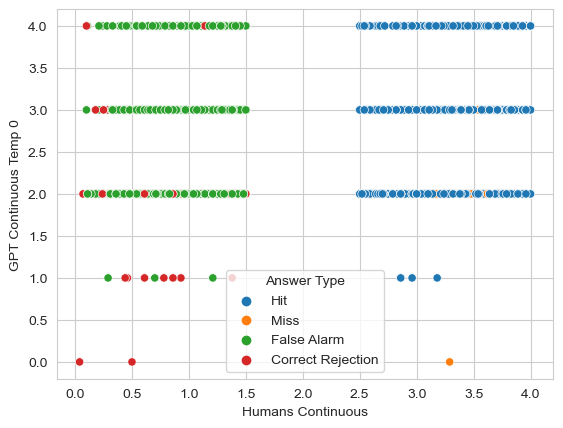

In [438]:
sn.scatterplot(data=remove_by_SD, x='Humans Continuous', y='GPT Continuous Temp 0', hue='Answer Type')

In [447]:
binary_for_ROC = [
    (remove_by_SD['Humans Binary'] == 'Nonsense'),
    (remove_by_SD['Humans Binary'] == 'Makes Sense')
]

binary_for_GPT = [
    (remove_by_SD['GPT Temp 1'] == 'Nonsense'),
    (remove_by_SD['GPT Temp 1'] == 'Makes Sense')
]

labels_for_ROC = [0, 1]

remove_by_SD['Truth'] = np.select(binary_for_ROC, labels_for_ROC)
remove_by_SD['Predicted'] = np.select(binary_for_GPT, labels_for_ROC)
remove_by_SD['Random'] = np.random.randint(0,2,size=len(remove_by_SD))

truth = remove_by_SD['Truth'].to_numpy()
predicted = remove_by_SD['Predicted'].to_numpy()
random = remove_by_SD['Random'].to_numpy()

print('true ratings (generated by people):', truth)
print('predicted by GPT:', predicted)
print('randomly generated:', random)

true ratings (generated by people): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
predicted by GPT: [1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

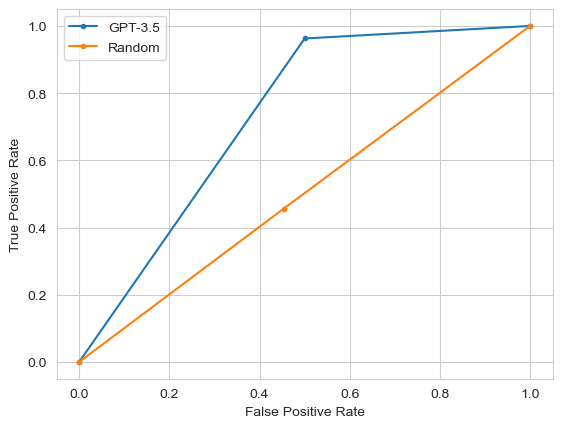

In [448]:
fpr, tpr, thresholds = roc_curve(truth, predicted, pos_label=1)
rand_fpr, rand_tpr, thresholds = roc_curve(truth, random, pos_label=1)

pyplot.plot(fpr, tpr, marker='.', label='GPT-3.5')
pyplot.plot(rand_fpr, rand_tpr, marker='.', label='Random')
# plot the roc curve for the model
pyplot.legend()
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [449]:
rand_auc = roc_auc_score(truth, random)
GPT_auc = roc_auc_score(truth, predicted)

print('Random Prediction: ', rand_auc)
print('GPT Prediction: ', GPT_auc)

Random Prediction:  0.5013286564625851
GPT Prediction:  0.7312925170068028
